In [ ]:
# Alberto Bejarano (2025)
# UnifComparation_v01.ipynb

In [ ]:
# KL Divergence, Chi-Square Test, and Nearest Neighbor Distance
#
#   |          Method    | What it Measures                         | Good for Detecting                      | Best Used When                                    |
#   |--------------------|------------------------------------------|-----------------------------------------|---------------------------------------------------|
#   | KL Divergence      | Overall difference from uniformity       | General deviations (clusters & gaps)    | Checking deviation from a known distribution      |
#   | Chi-Square Test    | Statistical significance of uniformity   | Small deviations                        | You need a 'p-value' for confidence               |
#   | Nearest Neighbor*  | Local uniformity                         | Clustering and spacing inconsistencies  | You want to see 'how evenly spaced' points are    |
#
# Comparison of Methods for Measuring Uniformity in 2D Distributions
#
#   |            Method        | Uniform Distribution               | Non-Uniform Distribution           |
#   |--------------------------|------------------------------------|------------------------------------|
#   | Scatter Plot             | Even spread                        | Clusters & gaps                    |
#   | KL Divergence            | Lower value (close to 0)           | Higher value                       |
#   | Chi-Square Test          | Higher p-value (>0.05)             | Lower p-value (<0.05)              |
#   | Nearest Neighbor*        | Even spacing, low variance         | Clustering, high variance          |
#
# Summary
#  Use KL Divergence + Chi-Square Test** if you need precise statistical comparison.
#  Use Nearest Neighbor Distance** to check if points are evenly spaced.

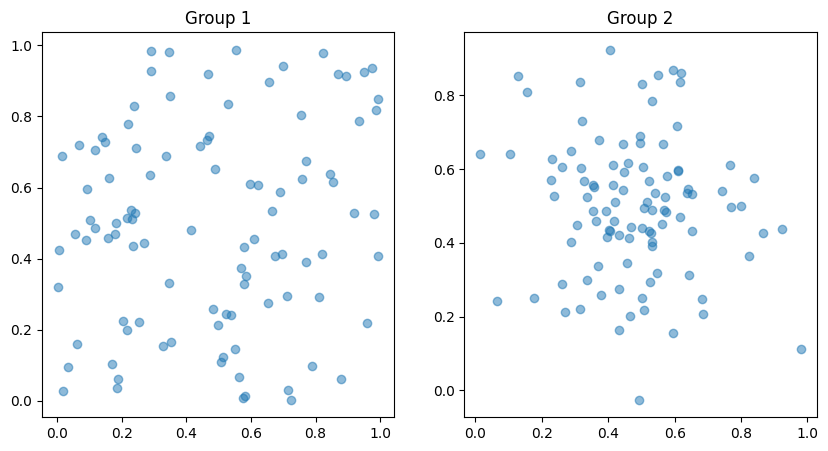

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
group1 = np.random.uniform(0, 1, (100, 2))      # More uniform
group2 = np.random.normal(0.5, 0.2, (100, 2))   # More clustered

# print(group1); print(group2)

# Scatter plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(group1[:, 0], group1[:, 1], alpha=0.5)
axs[0].set_title("Group 1")

axs[1].scatter(group2[:, 0], group2[:, 1], alpha=0.5)
axs[1].set_title("Group 2")

plt.show()

In [4]:
# KL Divergence (Kullback-Leibler Divergence) measures how much one probability distribution, such as your dataset, differs from another, typically a perfectly uniform distribution.
# If a dataset were perfectly uniform, its density in every region of the space would be exactly equal, and KL divergence quantifies how far it deviates from this ideal.
# The process involves dividing the space into bins (e.g., a 10×10 grid for 2D points) and counting the number of points in each bin to obtain the observed probability distribution.
# This observed distribution is then compared to a truly uniform one, and the KL divergence formula calculates the difference between them, providing a measure of how much the dataset
# deviates from uniformity.

from scipy.stats import entropy

def kl_divergence(group):
    hist, _ = np.histogramdd(group, bins=10, density=True)
    uniform = np.ones_like(hist) / hist.size  # Ideal uniform distribution
    return entropy(hist.ravel(), uniform.ravel())

kl1 = kl_divergence(group1)
kl2 = kl_divergence(group2)

# Lower KL divergence → closer to uniformity.
# Higher KL divergence → more deviation (more clusters or gaps).

print(f"KL Divergence - Group 1: {kl1:.4f}")
print(f"KL Divergence - Group 2: {kl2:.4f}")

KL Divergence - Group 1: 0.6398
KL Divergence - Group 2: 0.8907


In [6]:
# The Chi-Square Test is a statistical test that evaluates how well the observed frequencies in a dataset match the expected frequencies of a uniform distribution. 
# If a dataset is truly uniform, each bin should contain approximately the same number of points. To apply the test, the space is divided into bins (similar to KL divergence),
# and the number of points in each bin is counted. These observed frequencies are then compared to the expected frequencies, which would be evenly distributed in a uniform dataset.
# The chi-square statistic quantifies the difference between observed and expected counts, helping determine whether the dataset significantly deviates from uniformity

from scipy.stats import chisquare

def chi_square_uniformity(group):
    hist, _ = np.histogramdd(group, bins=10)
    expected = np.full_like(hist, np.mean(hist))  # Expected uniform frequencies
    return chisquare(hist.ravel(), expected.ravel())[1]  # p-value

p1 = chi_square_uniformity(group1)
p2 = chi_square_uniformity(group2)

# Higher p-value (p>0.05p>0.05) → data is close to uniform.
# Lower p-value (p<0.05p<0.05) → significant deviation from uniformity.

print(f"Chi-Square p-value - Group 1: {p1:.4f}")
print(f"Chi-Square p-value - Group 2: {p2:.4f}")

Chi-Square p-value - Group 1: 0.2114
Chi-Square p-value - Group 2: 0.0000


In [8]:
# Nearest Neighbor Distance (NND) is a measure of how evenly spaced points are within a dataset. In a uniform distribution, the distances between points are nearly equal, whereas in a
# clustered distribution, some points are very close together while others are far apart. To compute NND, the distance from each point to its nearest neighbor is calculated.
# The variance of these distances is then measured—if the variance is low, the points are evenly spaced, indicating a uniform distribution. Conversely, a high variance suggests 
# that some points are clustered while others are widely separated, signifying a non-uniform distribution.

from scipy.spatial import distance

def mean_nearest_neighbor_distance(group):
    dists = distance.cdist(group, group)
    np.fill_diagonal(dists, np.inf)
    return np.mean(np.min(dists, axis=1))

mnd1 = mean_nearest_neighbor_distance(group1)
mnd2 = mean_nearest_neighbor_distance(group2)

# Lower variance in nearest-neighbor distances → uniform distribution.
# Higher variance → non-uniform distribution with clusters or gaps.

print(f"Mean Nearest Neighbor Distance - Group 1: {mnd1:.4f}")
print(f"Mean Nearest Neighbor Distance - Group 2: {mnd2:.4f}")

Mean Nearest Neighbor Distance - Group 1: 0.0496
Mean Nearest Neighbor Distance - Group 2: 0.0455
